**AIDI 1002: Machine Learning Programming — Assignment - 1**



---



1. Consider the dataset ‘noisy_data.csv’ and apply the following pre-processing techniques and obtain the clean dataset.
  * Handling missing values by imputation (10 points)
  * Apply Normality tests to numerical columns and state the hypothesis clearly and comment on the normality of the
data (10 points)
  * Apply encodings for categorical variable and scale the features (10 points)




---

Solution:


---



In [528]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [529]:
#importing dataset
df = pd.read_csv("/content/noisy_data.csv")
df

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes
5,India,40.0,69600.0,Yes
6,Brazil,NaN,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes


In [530]:
df.columns

Index(['Region', 'Age', 'Income', 'Online Shopper'], dtype='object')

In [531]:
df.dtypes

Region             object
Age               float64
Income            float64
Online Shopper     object
dtype: object

In [532]:
df.describe()

,Age,Income
count,9.000000,9.000000
mean,43.777778,76533.333333
std,7.693793,14718.695594
min,32.000000,57600.000000
25%,40.000000,64800.000000
50%,43.000000,73200.000000
75%,49.000000,86400.000000
max,55.000000,99600.000000


In [533]:
df.shape[1]

4

In [534]:
df.iloc[1]

Region             Brazil
Age                  32.0
Income            57600.0
Online Shopper        Yes
Name: 1, dtype: object

In [535]:
x = df.iloc[:,:-1].values

In [536]:
# importing an array of features
x = df.iloc[:, :-1].values
# importing an array of dependent variable
y = df.iloc[:, -1].values

In [537]:
x

array([['India', 49.0, 86400.0],
       ['Brazil', 32.0, 57600.0],
       ['USA', 35.0, 64800.0],
       ['Brazil', 43.0, 73200.0],
       ['USA', 45.0, nan],
       ['India', 40.0, 69600.0],
       ['Brazil', nan, 62400.0],
       ['India', 53.0, 94800.0],
       ['USA', 55.0, 99600.0],
       ['India', 42.0, 80400.0]], dtype=object)

### Missing Data
* Mean Imputation for handling missing values


In [538]:
from sklearn.impute import SimpleImputer
# To replace the missing value we create below object of SimpleImputer class
imputa = SimpleImputer(missing_values = np.nan, strategy = 'mean')

#The `fit()` method identifies the missing values and computes the mean of such feature a missing value is present.
imputa.fit(x[:, 1:3])

# Repalcing the missing value using transform method
x[:, 1:3] = imputa.transform(x[:, 1:3])

In [539]:
x

array([['India', 49.0, 86400.0],
       ['Brazil', 32.0, 57600.0],
       ['USA', 35.0, 64800.0],
       ['Brazil', 43.0, 73200.0],
       ['USA', 45.0, 76533.33333333333],
       ['India', 40.0, 69600.0],
       ['Brazil', 43.77777777777778, 62400.0],
       ['India', 53.0, 94800.0],
       ['USA', 55.0, 99600.0],
       ['India', 42.0, 80400.0]], dtype=object)

In [540]:
df['Region'].value_counts()

Region
India     4
Brazil    3
USA       3
Name: count, dtype: int64

**Normality tests to numerical columns and hypothesis**

There are two Normality tests:
  * Shapiro-Wilk test
  * D'Agostino's K-squared test

For both tests we take **0.05** as chosen significance level.

In [541]:
# Applying Shapiro-Wilk Normality test to numerical columns
from scipy.stats import shapiro
for column in ['Age', 'Income']:
    stat, p = shapiro(df[column])
    print(f'Column {column}: Statistic={stat}, p-value={p}')
    if p > 0.05:
        print(f'Column {column} is likely normally distributed.')
    else:
        print(f'Column {column} is not normally distributed.')

Column Age: Statistic=nan, p-value=1.0
Column Age is likely normally distributed.
Column Income: Statistic=nan, p-value=1.0
Column Income is likely normally distributed.


**Conlusion:**
From the results of test on numerical values 'Age' and ' Income', P-value is greater that 0.05 which implies both of them are normally distributed as we fail to reject the null hypothesis.

**Shapiro-Wilk test Hypothesis:**

* If the p-value is less than chosen significance level, reject the null hypothesis and conclude that the data is not normally distributed.
* Otherwise, if the p-value is greater than your significance level, we fail to reject the null hypothesis, indicating that the data appears to be normally distributed.

In [542]:
from scipy.stats import normaltest

# Applying D'Agostino's K-squared test to 'Age' and 'Income' columns
for column in ['Age', 'Income']:
    stat, p = normaltest(df[column].dropna())
    print(f'Column {column}: Statistic={stat}, p-value={p}')
    if p > 0.05:
        print(f'Column {column} is likely normally distributed.')
    else:
        print(f'Column {column} is not normally distributed.')


Column Age: Statistic=0.2511291987302724, p-value=0.8819987860250403
Column Age is likely normally distributed.
Column Income: Statistic=1.1027135858200583, p-value=0.5761675397779294
Column Income is likely normally distributed.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


**Conclusion:** The P-value for both 'Age' and 'Income' is greater than 0.05. Hence we fail to reject the null hypothesis and conclude that data significantly deviates from a normal distribution.

**D'Agostino's K-squared test Hypothesis:**

* If the p-value is less than chosen significance level, then reject the null hypothesis, suggesting that the data does not come from a normal distribution.

* Conversely, if the p-value is greater than the significance level, we fail to reject the null hypothesis, indicating that there is not enough evidence to conclude that the data significantly deviates from a normal distribution.


**Conclusion of Normality tests:** By conducting both D'Agostino's K-squared test and Shapiro-Wilk test, we come to the conclusion that numerical values are normally distributed.

**Encodings for categorical variable and scale the features**:

In [543]:
#Applying Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder= 'passthrough')
x = np.array(ct.fit_transform(x))

In [544]:
x

array([[0.0, 1.0, 0.0, 49.0, 86400.0],
       [1.0, 0.0, 0.0, 32.0, 57600.0],
       [0.0, 0.0, 1.0, 35.0, 64800.0],
       [1.0, 0.0, 0.0, 43.0, 73200.0],
       [0.0, 0.0, 1.0, 45.0, 76533.33333333333],
       [0.0, 1.0, 0.0, 40.0, 69600.0],
       [1.0, 0.0, 0.0, 43.77777777777778, 62400.0],
       [0.0, 1.0, 0.0, 53.0, 94800.0],
       [0.0, 0.0, 1.0, 55.0, 99600.0],
       [0.0, 1.0, 0.0, 42.0, 80400.0]], dtype=object)

In [545]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [546]:
#Scaling Features
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Scale the features (input data)
x_scaled = scaler.fit_transform(x)

# Print the scaled features
print(x_scaled)

[[-0.65465367  1.22474487 -0.65465367  0.75887436  0.74947325]
 [ 1.52752523 -0.81649658 -0.65465367 -1.71150388 -1.43817841]
 [-0.65465367 -0.81649658  1.52752523 -1.27555478 -0.89126549]
 [ 1.52752523 -0.81649658 -0.65465367 -0.11302384 -0.25320042]
 [-0.65465367 -0.81649658  1.52752523  0.17760889  0.        ]
 [-0.65465367  1.22474487 -0.65465367 -0.54897294 -0.52665688]
 [ 1.52752523 -0.81649658 -0.65465367  0.         -1.0735698 ]
 [-0.65465367  1.22474487 -0.65465367  1.34013983  1.38753832]
 [-0.65465367 -0.81649658  1.52752523  1.63077256  1.75214693]
 [-0.65465367  1.22474487 -0.65465367 -0.25834021  0.29371249]]




---




---



2. Consider the text present in the file ‘wiki.txt’ and Answer the following questions :
  * Write a program to convert following text into tokens with two tokenization methods such as ‘RegexpTokenizer()’
and ‘word_tokenize()’ from NLTK library. (Note :The tokens should not have stop words and punctuation symbols.
Feel free to decide about the correct list of stop words; e.g., negative words (don’t) could be important for you.
Execute both methods of tokenization along with your code of removing stop words and punctuation.) (10 points)
  * Write a regular expression to extract all the year mentions in the ‘wiki.txt’ file. (10 points)
  * State the differences observed in the output of tokenization methods. (10 points)



---
Solution:


---




In [547]:
! pip install nltk

In [548]:
#importing libraries
import re
import string
import math
import pandas as pd

import nltk
nltk.download('punkt')
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize

# Define column names
column_names = [ 'Text']
data = pd.read_csv('/content/wiki.csv', sep=';', on_bad_lines='skip', names=column_names)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [549]:
data.head()

,Text
0,The history of NLP generally started in the 19...
1,The Georgetown experiment in 1954 involved ful...
2,Some notably successful NLP systems developed ...


In [550]:
data.columns

Index(['Text'], dtype='object')

In [551]:
data['Text'][0]

'The history of NLP generally started in the 1950s, although work can be found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.'

In [552]:
contractions_dict = {"ain't": "are not","'s":" is","aren't": "are not"}
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

In [553]:
data['Text']=data['Text'].apply(lambda x:expand_contractions(x))

In [554]:
data["Text"] = data["Text"].str.lower()

In [555]:
data['Text'][0]

'the history of nlp generally started in the 1950s, although work can be found from earlier periods. in 1950, alan turing published an article titled "computing machinery and intelligence" which proposed what is now called the turing test as a criterion of intelligence.'

In [556]:
data['Text'] = data['Text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))

In [557]:
data['Text'][0]

'the history of nlp generally started in the 1950s although work can be found from earlier periods in 1950 alan turing published an article titled computing machinery and intelligence which proposed what is now called the turing test as a criterion of intelligence'

In [558]:
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [559]:
#removing stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.add('subject')
stop_words.add('http')
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
data['Text'] = data['Text'].apply(lambda x: remove_stopwords(x))

In [560]:
stop_words = set(stopwords.words('english'))

In [561]:
data['Text'][0]

'history nlp generally started 1950s although work found earlier periods 1950 alan turing published article titled computing machinery intelligence proposed called turing test criterion intelligence'

In [562]:
#Avoiding stemming as it's not necessory for this dataset
#from nltk.stem import PorterStemmer
#stemmer = PorterStemmer()
#def stem_words(text):
#    return " ".join([stemmer.stem(word) for word in text.split()])
#data["Text"] = data["Text"].apply(lambda x: stem_words(x))

In [563]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [564]:
#Performing Lemmatizer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
data["Text"] = data["Text"].apply(lambda text: lemmatize_words(text))

In [565]:
data['Text'][0]

'history nlp generally started 1950s although work found earlier period 1950 alan turing published article titled computing machinery intelligence proposed called turing test criterion intelligence'

In [566]:
data.head()

,Text
0,history nlp generally started 1950s although w...
1,georgetown experiment 1954 involved fully auto...
2,notably successful nlp system developed 1960s ...


**Converting text into tokens with two tokenization method:**
* ‘RegexpTokenizer()’
* ‘word_tokenize()’

In [567]:
# Tokenization using RegexpTokenizer
tokenizer_regex = RegexpTokenizer(r'\b\w+\b')
data['Tokens_RegexpTokenizer'] = data['Text'].apply(lambda x: tokenizer_regex.tokenize(x.lower()))

# Tokenization using word_tokenize
data['Tokens_word_tokenize'] = data['Text'].apply(lambda x: word_tokenize(x.lower()))

# Displaying the DataFrame with tokenized text
print(data.head())

                                                Text  \
0  history nlp generally started 1950s although w...   
1  georgetown experiment 1954 involved fully auto...   
2  notably successful nlp system developed 1960s ...   

                              Tokens_RegexpTokenizer  \
0  [history, nlp, generally, started, 1950s, alth...   
1  [georgetown, experiment, 1954, involved, fully...   
2  [notably, successful, nlp, system, developed, ...   

                                Tokens_word_tokenize  
0  [history, nlp, generally, started, 1950s, alth...  
1  [georgetown, experiment, 1954, involved, fully...  
2  [notably, successful, nlp, system, developed, ...  


In [568]:
for index, row in data.head().iterrows():
    print(row['Tokens_RegexpTokenizer'])

['history', 'nlp', 'generally', 'started', '1950s', 'although', 'work', 'found', 'earlier', 'period', '1950', 'alan', 'turing', 'published', 'article', 'titled', 'computing', 'machinery', 'intelligence', 'proposed', 'called', 'turing', 'test', 'criterion', 'intelligence']
['georgetown', 'experiment', '1954', 'involved', 'fully', 'automatic', 'translation', 'sixty', 'russian', 'sentence', 'english', 'author', 'claimed', 'within', 'three', 'five', 'year', 'machine', 'translation', 'would', 'solved', 'problem2', 'however', 'real', 'progress', 'much', 'slower', 'alpac', 'report', '1966', 'found', 'tenyearlong', 'research', 'failed', 'fulfill', 'expectation', 'funding', 'machine', 'translation', 'dramatically', 'reduced', 'little', 'research', 'machine', 'translation', 'conducted', 'late', '1980s', 'first', 'statistical', 'machine', 'translation', 'system', 'developed']
['notably', 'successful', 'nlp', 'system', 'developed', '1960s', 'shrdlu', 'naturallanguage', 'system', 'working', 'restri

In [569]:
for index, row in data.head().iterrows():
    print(row['Tokens_word_tokenize'])

['history', 'nlp', 'generally', 'started', '1950s', 'although', 'work', 'found', 'earlier', 'period', '1950', 'alan', 'turing', 'published', 'article', 'titled', 'computing', 'machinery', 'intelligence', 'proposed', 'called', 'turing', 'test', 'criterion', 'intelligence']
['georgetown', 'experiment', '1954', 'involved', 'fully', 'automatic', 'translation', 'sixty', 'russian', 'sentence', 'english', 'author', 'claimed', 'within', 'three', 'five', 'year', 'machine', 'translation', 'would', 'solved', 'problem2', 'however', 'real', 'progress', 'much', 'slower', 'alpac', 'report', '1966', 'found', 'tenyearlong', 'research', 'failed', 'fulfill', 'expectation', 'funding', 'machine', 'translation', 'dramatically', 'reduced', 'little', 'research', 'machine', 'translation', 'conducted', 'late', '1980s', 'first', 'statistical', 'machine', 'translation', 'system', 'developed']
['notably', 'successful', 'nlp', 'system', 'developed', '1960s', 'shrdlu', 'naturallanguage', 'system', 'working', 'restri

**Conclusion**:

For the given dataset 'wiki.csv', comparing the outputs of both tokenization methods, it seems that both methods produce identical tokenization results for the same rows. Each method successfully tokenized the text into words, including handling punctuation and numbers appropriately. Therefore, the outputs of both methods are the same.

**Extracting all year mentions in the 'wiki.txt' file:**

In [570]:
# Regular expression to extract year mentions in the dataset
year_regex = r'\b\d{4}\b'

# Extracting year mentions from the 'Text' column
data['Year_Mentions'] = data['Text'].str.findall(year_regex)

data.head()


,Text,Tokens_RegexpTokenizer,Tokens_word_tokenize,Year_Mentions
0,history nlp generally started 1950s although w...,"[history, nlp, generally, started, 1950s, alth...","[history, nlp, generally, started, 1950s, alth...",[1950]
1,georgetown experiment 1954 involved fully auto...,"[georgetown, experiment, 1954, involved, fully...","[georgetown, experiment, 1954, involved, fully...","[1954, 1966]"
2,notably successful nlp system developed 1960s ...,"[notably, successful, nlp, system, developed, ...","[notably, successful, nlp, system, developed, ...","[1964, 1966]"


In [571]:
print("Following are the years mentioned in the dataset:")
for index, row in data.head().iterrows():
    print(row['Year_Mentions'])

Following are the years mentioned in the dataset:
['1950']
['1954', '1966']
['1964', '1966']




---




---



3. Consider this dataset from kaggle. (Download the dataset from following link : https://www.kaggle.com/dansbecker/
melbourne-housing-snapshot/home) and answer the following questions :
* Apply the feature selection techniques over the melbourne-housing -dataset namely (20 points):
  * Correlation
  * Chi-Square
  * Mutual-Information
  * Random Forest feature importance
* Compare the importance of selected features using bar chart (10 points).
* Comment on the results obtained from various feature selection techniques and which is the best and worst feature
selection selection technique on the given dataset (10 points).




---

Solution:


---



**Feature Selection:**

In [572]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # data visualization library
import matplotlib.pyplot as plt
import time
from subprocess import check_output
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [573]:
dm = pd.read_csv("/content/melb_data.csv")
dm.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


Feature selection for categorical variables

In [574]:
dm.columns       # .columns gives columns names in data

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [575]:
dm.dtypes        # .dtypes gives data types of columns in data

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [576]:
y = dm['Type']                   # h,t or u
list = ['Suburb','Address','Type','Method','SellerG','Date','CouncilArea','Regionname']
x = dm.drop(list,axis = 1 )
x.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,4019.0
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.7969,144.9969,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0


In [577]:
dm['Type'].unique()

array(['h', 'u', 't'], dtype=object)

Number of House:  9449
Number of Unit :  3017
Number of Townhouse :  1114


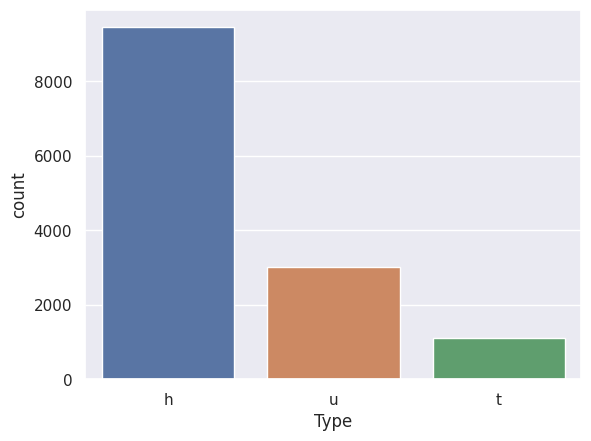

In [578]:
sns.set(style="darkgrid")
ax = sns.countplot(x = y, hue=y)       # H = 9449, T = 1114 , U = 3017
h, u, t = y.value_counts(sort=True)
print('Number of House: ',h)
print('Number of Unit : ',u)
print('Number of Townhouse : ',t)

In [579]:
x.isnull().values.any()

True

In [580]:
x.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


Using Chi-Square, T-test and Random Forest to select the features

In [581]:
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFpr, chi2, SelectKBest, SelectFwe, f_classif, SelectFdr

import matplotlib.pyplot as plt
%matplotlib inline

# replace h with 0, u with 1 and t with 2
my_map = {
          't':2,
          'h':0,
          'u':1
         }

dm['Type'] = dm['Type'].map(my_map)

# remove the suburb column
dm.drop(['Suburb'], axis=1, inplace=True)

dm.head(5)

,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,85 Turner St,2,0,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,25 Bloomburg St,2,0,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,5 Charles St,3,0,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,40 Federation La,3,0,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,55a Park St,4,0,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [582]:
my_important = []

for x in dm.columns[1:]:
    if dm[x].dtype != 'object':  # Check if the column is numeric
        pvalue = stats.ttest_ind(dm.loc[dm.Type==1][x], dm.loc[dm.Type==0][x])[1]
        if pvalue<0.05:
            my_important.append(x)
            print(f'The variable {x} is statistically significant with a pvalue = {pvalue:.2}')
        else:
            print(f'The variable {x} is NOT statistically significant')
    else:
        print(f'Skipping variable {x} because it is not numeric.') # Skip non-numeric columns

The variable Rooms is statistically significant with a pvalue = 0.0
The variable Type is statistically significant with a pvalue = 0.0
The variable Price is statistically significant with a pvalue = 0.0
Skipping variable Method because it is not numeric.
Skipping variable SellerG because it is not numeric.
Skipping variable Date because it is not numeric.
The variable Distance is statistically significant with a pvalue = 5.3e-165
The variable Postcode is statistically significant with a pvalue = 0.00049
The variable Bedroom2 is statistically significant with a pvalue = 0.0
The variable Bathroom is statistically significant with a pvalue = 2.1e-200
The variable Car is NOT statistically significant
The variable Landsize is NOT statistically significant
The variable BuildingArea is NOT statistically significant
The variable YearBuilt is NOT statistically significant
Skipping variable CouncilArea because it is not numeric.
The variable Lattitude is statistically significant with a pvalue =

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


<Axes: >

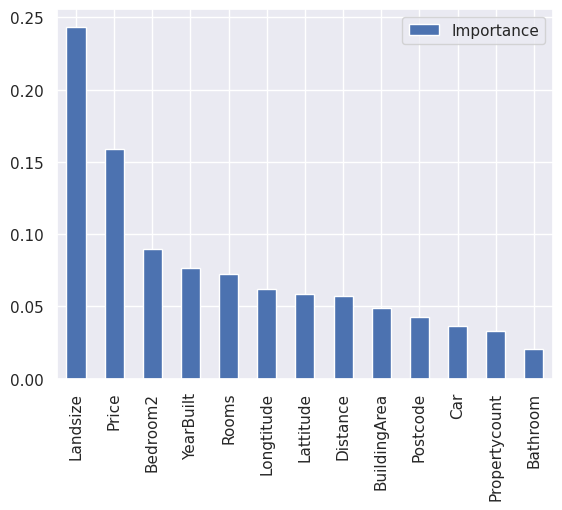

In [583]:
#Random Forest feature importance
clf = RandomForestClassifier( n_estimators=50)

y = dm['Type']
list = ['Address','Type','Method','SellerG','Date','CouncilArea','Regionname']
x = dm.drop(list,axis = 1 )

# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)

model = clf.fit(x_imputed,y)
feat_importances = pd.DataFrame(model.feature_importances_, index=x.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar')


**Importance of Selected Features:**

The bar chart’s feature importances reveal the contribution of each dataset feature to the model. From the chart:
* Landsize: The most important feature, indicating that the size of the land significantly influences property prices.
* Price: This can be taken as a target variable, it has value in future interactions and metrices.
* Rooms: The number of rooms is highly influential for it's relevance in determining property value.
* YearBuilt: The construction year of the property is important, as property age impact the price.
* Bedroom2: Number of bedrooms is also important.
* Lattitude: Its importance likely points to variations in value based on geographical positioning.
* Distance: The closeness to key locations affects the property’s valuation.
* Longtitude: Geographic longitude also plays a role, similar to latitude.
* BuildingArea: Size of the building contributes to the price.
* Postcode: Postal code impacts the price.
* Propertycount: Number of properties in the area has will also influence the price.
* Car: Number of carspots is less important.
* Bathroom: Number of bathrooms has the least importance.

**Analysis:**

Landsize holds the greatest importance, which is logical since larger plots tend to have higher value. Rooms, YearBuilt, and Bedroom2 are key internal characteristics that buyers focus on. Latitude, Distance, and Longitude emphasize the significance of location. BuildingArea and Postcode demonstrate the relevance of both the property's physical attributes and its neighborhood. Propertycount indicates a smaller yet significant effect of local real estate density. Carspots and Bathroom appear to be less important, potentially because they either show less variation or are not as highly prioritized by buyers.


In [584]:
#chi-square method
imputer = SimpleImputer(strategy='median')
x_impute = imputer.fit_transform(x)

# Clip values to be non-negative
x_impute = np.clip(x_impute, 0, None)  # Ensure all values are >= 0 for selecting top 5 features

selector = SelectKBest(score_func=chi2, k=5)
new_data = selector.fit_transform(x_impute, y)

mask = selector.get_support()
new_features = x.columns[mask]
new_features

Index(['Price', 'Distance', 'Landsize', 'BuildingArea', 'Propertycount'], dtype='object')

In [585]:
!pip install scikit-learn
from sklearn.feature_selection import mutual_info_classif

In [586]:
# Define the number of features to select
k = 5

# Select top k features using correlation (f_classif)
selector_corr = SelectKBest(score_func=f_classif, k=k)
x_corr = selector_corr.fit_transform(x_imputed, y)
corr_features = x.columns[selector_corr.get_support()]
# Get the selected features
corr_features = x.columns[selector_corr.get_support()]

# Extract the subset of features from x_imputed
x_corr_df = pd.DataFrame(x_corr, columns=corr_features)

# Compute the correlation matrix
corr_matrix = x_corr_df.corr()

# Print the correlation matrix
print("Correlation Matrix for Selected Features:")
print(corr_matrix)


Correlation Matrix for Selected Features:
              Rooms     Price  Bedroom2  Bathroom  YearBuilt
Rooms      1.000000  0.496634  0.944190  0.592934  -0.052112
Price      0.496634  1.000000  0.475951  0.467038  -0.262144
Bedroom2   0.944190  0.475951  1.000000  0.584685  -0.041894
Bathroom   0.592934  0.467038  0.584685  1.000000   0.120910
YearBuilt -0.052112 -0.262144 -0.041894  0.120910   1.000000


In [587]:
corr_features

Index(['Rooms', 'Price', 'Bedroom2', 'Bathroom', 'YearBuilt'], dtype='object')

In [588]:
# Select top k features using mutual information
selector_mi = SelectKBest(score_func=mutual_info_classif, k=k)
x_mi = selector_mi.fit_transform(x_imputed, y)
mi_features = x.columns[selector_mi.get_support()]

# Extract the subset of features from x_imputed
x_mi_df = pd.DataFrame(x_mi, columns=mi_features)

# Compute the correlation matrix
corr_matrix = x_mi_df.corr()

# Print the correlation matrix
print("Correlation Matrix for Selected Features using Mutual Information:")
print(corr_matrix)

Correlation Matrix for Selected Features using Mutual Information:
                 Rooms     Price  Bedroom2  Landsize  BuildingArea
Rooms         1.000000  0.496634  0.944190  0.025678      0.091373
Price         0.496634  1.000000  0.475951  0.037507      0.069570
Bedroom2      0.944190  0.475951  1.000000  0.025646      0.089102
Landsize      0.025678  0.037507  0.025646  1.000000      0.094659
BuildingArea  0.091373  0.069570  0.089102  0.094659      1.000000


In [589]:
mi_features

Index(['Rooms', 'Price', 'Bedroom2', 'Landsize', 'BuildingArea'], dtype='object')

**Random Forest Feature Selection technique:**
'Landslide' holds the greatest importance. Thereafter comes 'Price' which can be taken as the target variable. Also, 'Rooms', 'YearBuilt', and 'Bedroom2' are key internal characteristics that buyers focus on.

**Chi-Square technique:**

Index(['Price', 'Distance', 'Landsize', 'BuildingArea', 'Propertycount'], dtype='object')

'Price' holds the strongest connection to the target variable(assumed 'Room') and weak connection to feature subsets('Distance', 'Landsize', 'BuildingArea', 'Propertycount').

**Correlation technique:**

Index(['Rooms', 'Price', 'Bedroom2', 'Bathroom', 'YearBuilt'], dtype='object')

'Room' has the highest value and the number of rooms is highly correlated with the price. Typically, properties with more rooms tend to be more expensive, indicating a larger or more luxurious property.

**Mutual-Information technique:**

Index(['Rooms', 'Price', 'Bedroom2', 'Landsize', 'BuildingArea'], dtype='object')

The number of rooms or 'Rooms' has a high mutual information with the target variable( assuming price), suggesting that the number of rooms provides significant information about the house price. More rooms typically results with higher prices.

**Best Technique:** Random Forest Feature Selection. The method correctly identifies crucial features such as 'Landsize', 'Rooms', 'YearBuilt', and 'Bedroom2'.

**Worst Technique:** Chi-Square Technique as the techique identifies 'Price' as a feature and identifies 'Landsize', 'Distance', 'BuildingArea', and 'Propertycount' as important features.


---

